# Importing all the libraries

In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import StandardScaler, normalize, MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

# Read the Data

In [4]:
X = pd.read_csv('data.csv', error_bad_lines = False, header = None, names = ['P','Q'])

# Plotting Scatter Plot

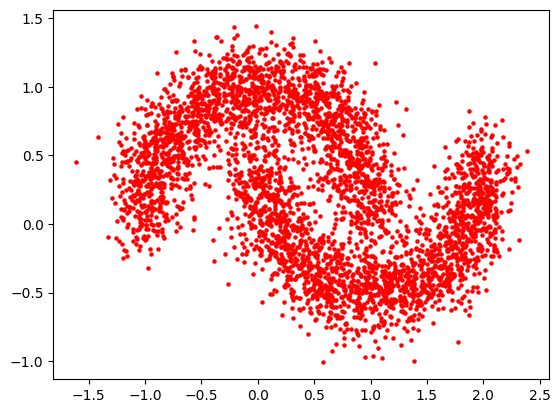

In [5]:
colors = ["blue", "red"]
colormap = mpl.colors.ListedColormap(colors)
plt.scatter(X.P, X.Q,color='red', cmap = colormap, s=5, )

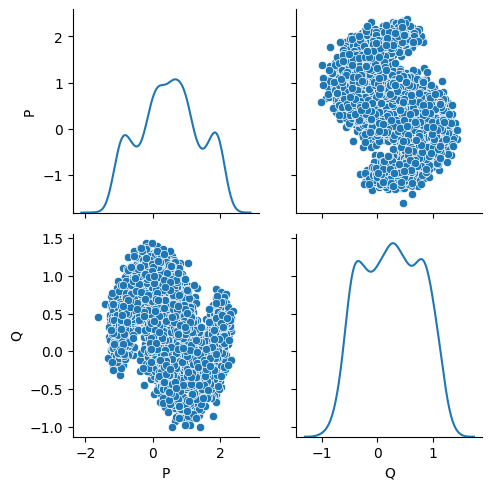

In [6]:
# PairGrid object with hue
graph = sns.PairGrid(X)
# type of graph for non-diagonal
graph = graph.map_offdiag(sns.scatterplot)
# type of graph for diagonal
graph = graph.map_diag(sns.kdeplot)
# to show
plt.show()

In [7]:
X = StandardScaler().fit_transform(X)

# K Means

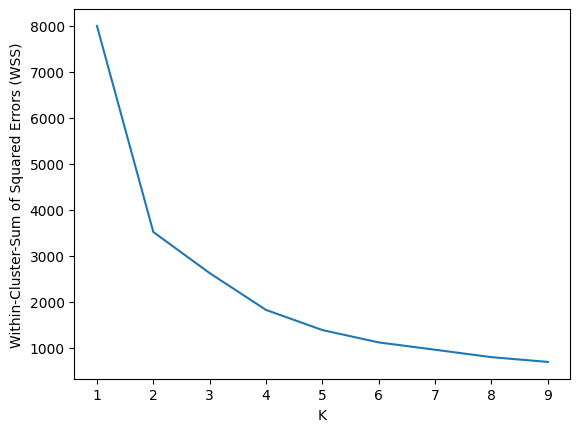

In [8]:
K=range(1,10)
wss = []

for k in K:
    kmeans=KMeans(
        n_clusters=k
    )
    kmeans=kmeans.fit(X)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K,wss)

#### It can be seen above that there is an **elbow bend** at K=2 i.e. it is the point after which WCSS does not diminish much with the increase in value of K.

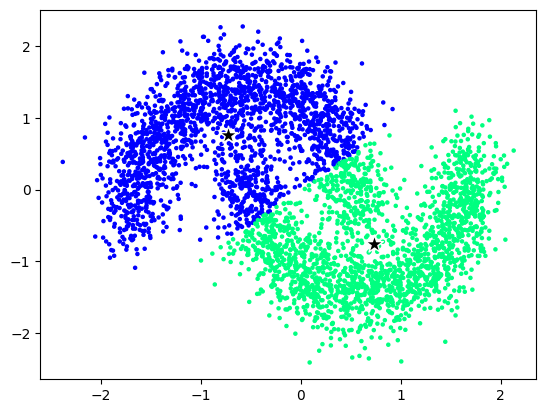

In [9]:
km=KMeans(n_clusters=2, init='random', random_state=0)
y_predicted = km.fit_predict(X)
plt.scatter(X[:,0],X[:,1], c = y_predicted, cmap =plt.cm.winter, s=5)

plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=180, marker='*',
    c='black', edgecolor='white'
)

#### The star pointer in the above plot shows centroid of each cluster

# Gaussian Mixture Models

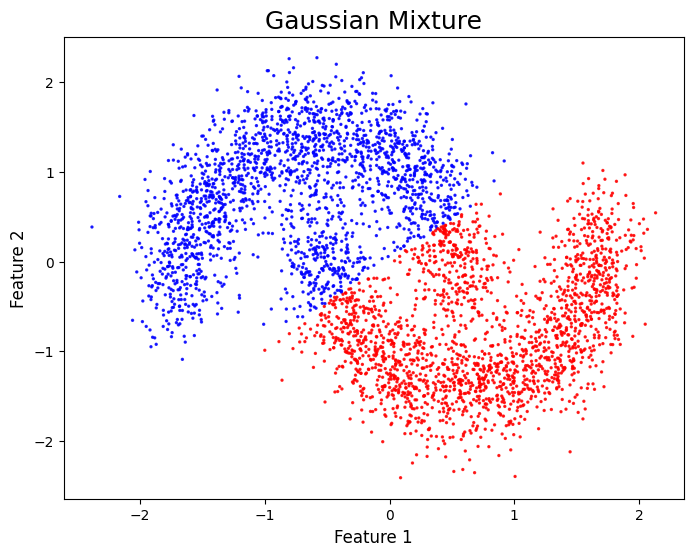

In [10]:
gauss=GaussianMixture(n_components = 2)
gauss.fit(X)
label = gauss.predict(X)
c = []
for i in label:
    if(i==0):
        c.append("b")
    else:
        c.append("r")
plt.figure(figsize=(8, 6))
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.scatter(X[:,0],X[:,1],s=2,c=c,alpha=0.8)
plt.title("Gaussian Mixture", fontsize=18)
plt.show()

# Agglomerative Clustering 

## *Single*

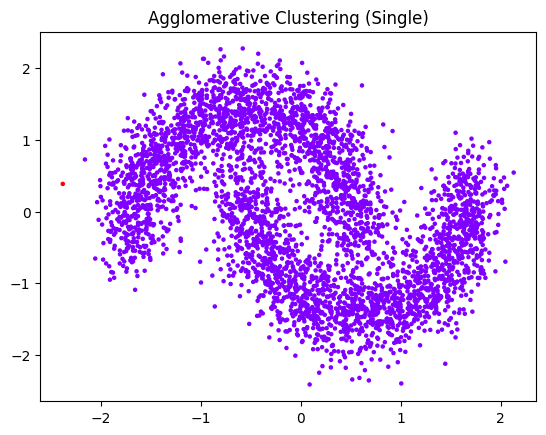

In [11]:
aglo = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
plt.scatter(X[:,0],X[:,1], c= aglo.fit_predict(X), cmap ='rainbow', s=5)
plt.title('Agglomerative Clustering (Single)')

plt.show()

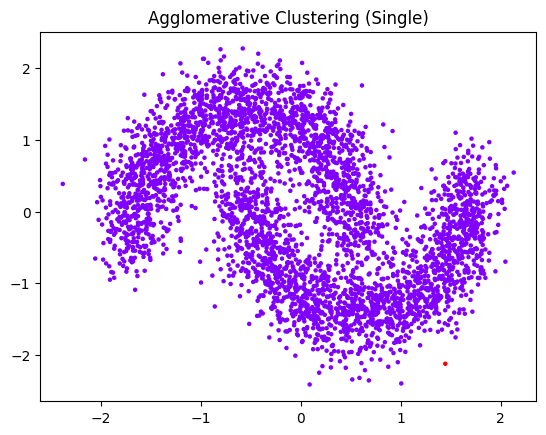

In [12]:
aglo = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='single')
aglo.fit_predict(X)
plt.scatter(X[:,0],X[:,1], c= aglo.fit_predict(X), cmap ='rainbow', s=5)
plt.title('Agglomerative Clustering (Single)')
plt.show()

# *Average*

In [13]:
plt.figure(figsize =(4, 4))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X, method ='average')))

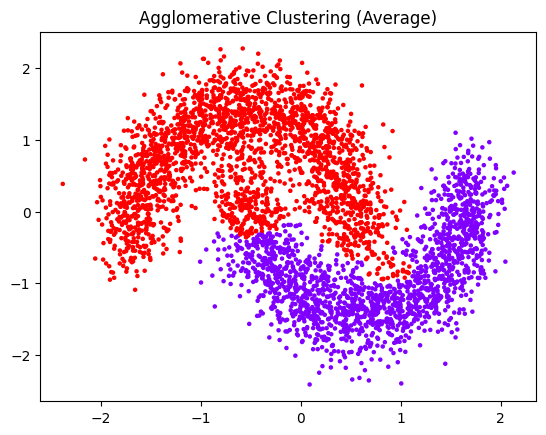

In [14]:
aglo = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='average')
aglo.fit_predict(X)
plt.scatter(X[:,0],X[:,1], c= aglo.fit_predict(X), cmap ='rainbow', s=5)
plt.title('Agglomerative Clustering (Average)')
plt.show()

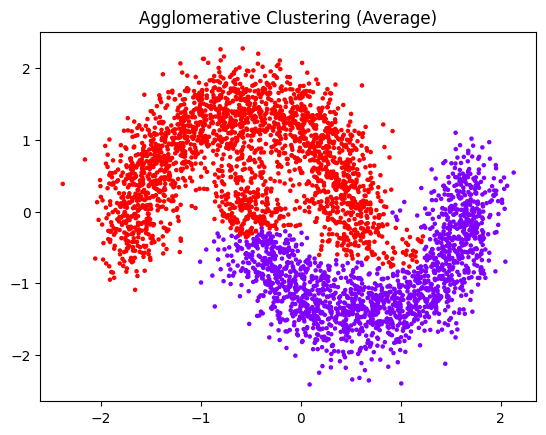

In [15]:
aglo = AgglomerativeClustering(n_clusters=2, linkage='average')
aglo.fit_predict(X)
plt.scatter(X[:,0],X[:,1], c= aglo.fit_predict(X), cmap ='rainbow', s=5)
plt.title('Agglomerative Clustering (Average)')

plt.show()

# *Ward*

In [16]:
plt.figure(figsize =(4, 4))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X, method ='ward')))

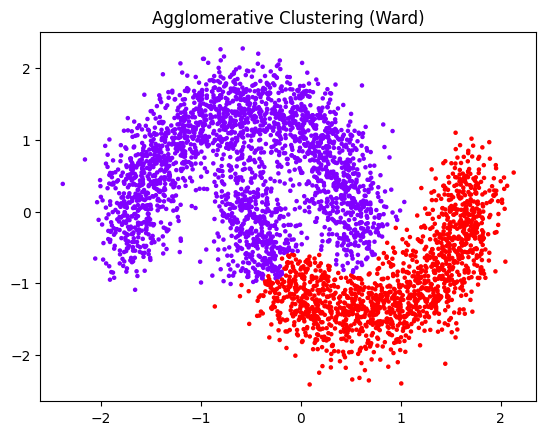

In [17]:
aglo = AgglomerativeClustering(n_clusters=2, linkage='ward')
aglo.fit_predict(X)
plt.scatter(X[:,0],X[:,1], c= aglo.fit_predict(X), cmap ='rainbow', s=5)
plt.title('Agglomerative Clustering (Ward)')

plt.show()

## *Complete*

In [18]:
plt.figure(figsize =(4, 4))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X, method ='complete')))

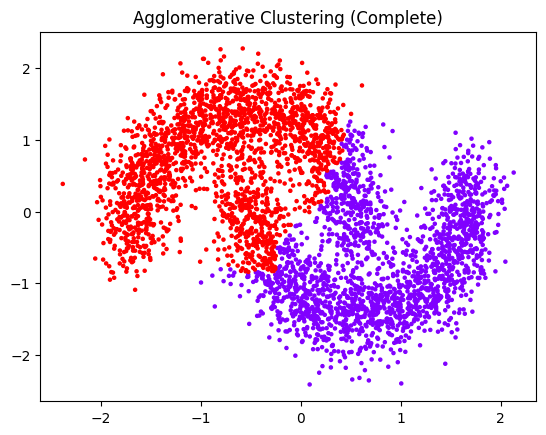

In [19]:
aglo = AgglomerativeClustering(n_clusters=2, linkage='complete')
aglo.fit_predict(X)
plt.scatter(X[:,0],X[:,1], c= aglo.fit_predict(X), cmap ='rainbow', s=5)
plt.title('Agglomerative Clustering (Complete)')

plt.show()

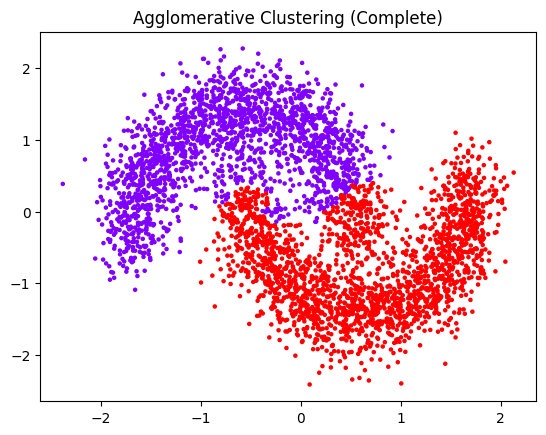

In [20]:
aglo = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='complete')
aglo.fit_predict(X)
plt.scatter(X[:,0],X[:,1], c= aglo.fit_predict(X), cmap ='rainbow', s=5)
plt.title('Agglomerative Clustering (Complete)')
plt.show()

# Spectral Clustering

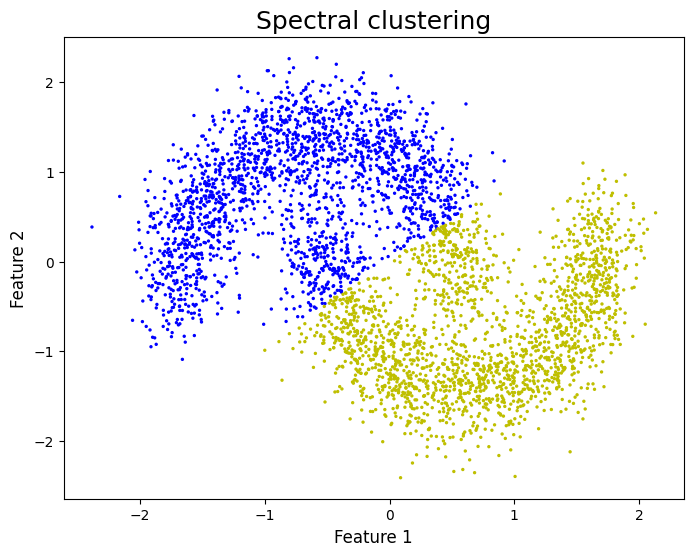

In [21]:
spectral_model_rbf = SpectralClustering(n_clusters=2, assign_labels='kmeans', random_state=0, n_jobs=-1)
spectral_model_rbf.fit(X)
label_rbf = spectral_model_rbf.fit_predict(X)
c = []
for i in label:
    if(i==0):
        c.append("b")
    else:
        c.append("y")
plt.figure(figsize=(8, 6))
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.scatter(X[:,0],X[:,1],s=2,c=c)
plt.title("Spectral clustering", fontsize=18)
plt.show()

MinusOne 325 One 1809 Zero 1866


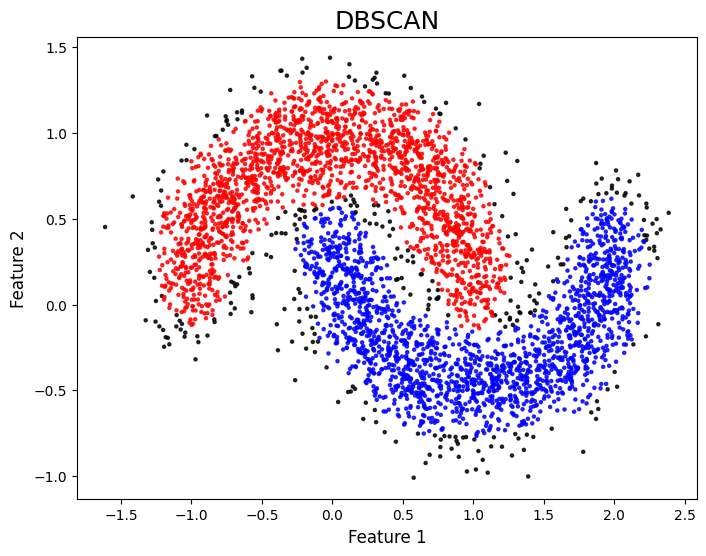

In [22]:
data = pd.read_csv("data.csv", header=None).values  # Data
db=DBSCAN(eps=0.15,min_samples=60) .fit(data)
clusters = db.fit_predict(data)
color = []
minusone=0
one=0
zero = 0
for i in clusters:
    if(i==-1):
        minusone+=1
        color.append("k")
    elif(i==0):
        zero+=1
        color.append("r")
    else:
        one+=1
        color.append("b")
print("MinusOne",minusone,"One",one,"Zero",zero)
plt.figure(figsize=(8, 6))
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.scatter(data[:,0],data[:,1],s=5,c= color,alpha=0.8)
plt.title("DBSCAN", fontsize=18)
plt.show()

Using DBSCAN method, we can observe that the data gets classified into three clusters: `0: red` and `1: blue` are perfect moon-shaped clusters (desired). But cluster `-1: black` is not desirable and contains noise.

The code below corrects for `-1: black` noise in DBSCAN model. 

We used Gaussian Mixture Model on these noise data to classify them in either `0: red` or `1: blue`.

Together combining features of both the models, we are able to classify the data correctly into two moon-shaped clusters.

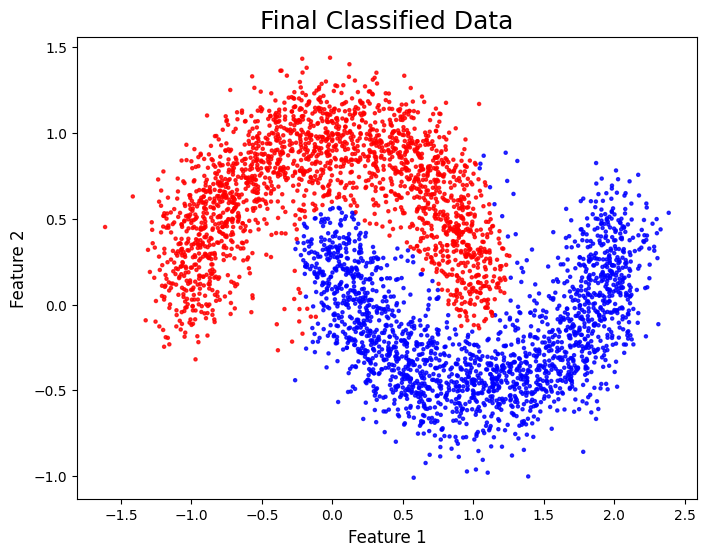

In [23]:
color = []
for i in range(len(clusters)):
    if(clusters[i]==-1):
        clusters[i] = gauss.predict([[data[i,0],data[i,1]]])
    if(clusters[i]==0):
        color.append("r")
    if(clusters[i]==1):
        color.append("b")
plt.figure(figsize=(8, 6))
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.scatter(data[:,0],data[:,1],s=5,c= color,alpha=0.8)
plt.title("Final Classified Data", fontsize=18)
plt.show()

Even combining with Spectral Clustering, this gives the same result. So we can take any one of them.

#Saving Cluster Labels as Text File

In [24]:
np.savetxt('sugandh_mittal_assignment_cluster_labels.txt', clusters, fmt='%d')

In [25]:
np.size(clusters)

4000